In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df_airbnb = pd.read_csv('Airbnb_Dataset_Final.csv')

In [15]:
df_airbnb

,ID,NAME,NEIGHBOUR OVERVIEW,Host Location,Host Neighbourhood,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Amenities,Price,Number of Reviews,Review Scores Rating
0,5456,"Walk to 6th, Rainey St and Convention Ctr",My neighborhood is ideally located if you want...,"Austin, TX",East Downtown,Entire guesthouse,Entire home/apt,3,1.0,1.0,2.0,"[""Hot water"", ""Extra pillows and blankets"", ""B...",$108.00,685,4.85
1,5769,NW Austin Room,Quiet neighborhood with lots of trees and good...,"Austin, TX",SW Williamson Co.,Private room in home,Private room,2,1.0,1.0,1.0,"[""Hot water"", ""Outdoor dining area"", ""Ceiling ...",$48.00,299,4.90
2,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",The neighborhood is fun and funky (but quiet)!...,"Austin, TX",Zilker,Entire guesthouse,Entire home/apt,2,1.0,1.0,2.0,"[""Free dryer \u2013 In building"", ""Hot water"",...",$159.00,322,4.97
3,8502,Woodland Studio Lodging,NaN,"Austin, TX",East Riverside,Entire guest suite,Entire home/apt,2,1.0,1.0,1.0,[],$48.00,53,4.56
4,13035,Historic house in highly walkable East Austin,East Cesar Chavez is a gentrifying urban area ...,"Austin, TX",East Downtown,Entire home,Entire home/apt,3,2.0,2.0,2.0,"[""Hot water"", ""Ceiling fan"", ""Extra pillows an...",$115.00,18,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,1179648103841615516,Condo in Downtown Austin,NaN,"Austin, TX",Downtown Austin,Entire condo,Entire home/apt,6,2.0,2.0,1.0,"[""Pool"", ""Hot water"", ""Outdoor dining area"", ""...",$175.00,0,NaN
7496,1179706530587604999,Modern greenbelt home,NaN,"Austin, TX",Steiner Ranch Neighborhood Association,Entire home,Entire home/apt,5,2.5,4.0,4.0,"[""Free parking on premises"", ""Pool"", ""TV"", ""Ai...",$195.00,0,NaN
7497,1179774207278830321,East Austin 1 bedroom chill pad,NaN,"Austin, TX",Holly,Entire home,Entire home/apt,2,1.0,1.0,1.0,"[""Hot water"", ""Outdoor dining area"", ""Ceiling ...",$113.00,0,NaN
7498,1179791941430472364,Eclectic Eastside Artist Condo,NaN,"Austin, TX",East Riverside - Oltorf,Private room in home,Private room,2,1.0,1.0,1.0,"[""Free parking on premises"", ""TV"", ""Air condit...",$32.00,0,NaN


In [13]:
os.getcwd()

'/Users/arsh10/Desktop/DATA SCIENCE/Data Sci Progr.'

In [4]:
df_airbnb.shape

(7500, 15)

In [6]:
df_airbnb.insert(0,'Prim_ID',df_airbnb.index)

In [ ]:
df_airbnb['property_type'].value_counts() #overview of which type of property is more common

In [7]:
df_airbnb.columns = df_airbnb.columns.str.lower().str.replace(' ','_')


In [6]:
df_airbnb.columns

Index(['ID', 'NAME', 'NEIGHBOUR OVERVIEW', 'Host Location',
       'Host Neighbourhood', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Amenities', 'Price',
       'Number of Reviews', 'Review Scores Rating'],
      dtype='object')

In [ ]:
df_airbnb.iloc[:,2:].describe().T # 132 max beds doesn't seem right.

In [ ]:
df_airbnb[df_airbnb['beds'] > 25]

In [ ]:
# October 2 EDA ------

In [9]:
df_cleaned = df_airbnb.dropna(subset = ['neighbour_overview'])
df_cleaned
df_cleaned.duplicated(subset = ['neighbour_overview']).sum()



np.int64(820)

In [ ]:
#Duplicates excluding NA values
# there are 108 duplicate rows in 'name' column
# there are 820 duplicates in 'neighbour_overview' column after dropping na values
# after checking the duplicates in 'neighbour_overview' we confirmed that they're not duplicate rows, it's just that the /
# description of neighborhood is same. 

# now we can check if (name, neighbour_overview, number of reviews, and ratings) are the same, then it's actually a duplicate.
# And we can drop it






In [10]:
df_airbnb = df_airbnb.loc[~df_airbnb.duplicated(subset = ['name','neighbour_overview','amenities','beds','number_of_reviews','price','review_scores_rating'],keep = False)]\
.reset_index(drop=True).copy()
# we're gonna drop these

In [17]:
# df_airbnb.drop('prim_id',axis =1, inplace = True)
df_airbnb.insert(0,'prim_id',df_airbnb.index)

str

In [20]:
# df_airbnb.loc[:,"price"] = df_airbnb.loc[:,"price"].replace({'\$':'',',':''}, regex = True).astype(float)

viz = df_airbnb.groupby('host_neighbourhood')['price'].mean().sort_values(ascending = False).head(5)


<Axes: xlabel='host_neighbourhood'>

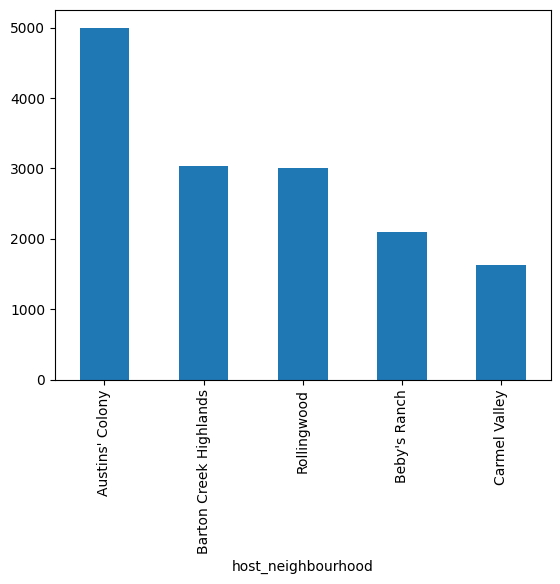

In [21]:
viz.plot(kind = 'bar')

In [ ]:
#---October 9 EDA ----#

In [22]:
df_airbnb.loc[:,'prim_id'] = df_airbnb.index

In [23]:
df_airbnb['new_col'] = (df_airbnb.loc[:,'review_scores_rating']/5)*100

In [24]:
df_airbnb.rename(
columns = {
'new_col':'ratings_as_percent'
    
}, inplace = True
)

In [25]:
df_airbnb

,prim_id,id,name,neighbour_overview,host_location,host_neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,ratings_as_percent
0,0,5456,"Walk to 6th, Rainey St and Convention Ctr",My neighborhood is ideally located if you want...,"Austin, TX",East Downtown,Entire guesthouse,Entire home/apt,3,1.0,1.0,2.0,"[""Hot water"", ""Extra pillows and blankets"", ""B...",108.0,685,4.85,97.0
1,1,5769,NW Austin Room,Quiet neighborhood with lots of trees and good...,"Austin, TX",SW Williamson Co.,Private room in home,Private room,2,1.0,1.0,1.0,"[""Hot water"", ""Outdoor dining area"", ""Ceiling ...",48.0,299,4.90,98.0
2,2,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",The neighborhood is fun and funky (but quiet)!...,"Austin, TX",Zilker,Entire guesthouse,Entire home/apt,2,1.0,1.0,2.0,"[""Free dryer \u2013 In building"", ""Hot water"",...",159.0,322,4.97,99.4
3,3,8502,Woodland Studio Lodging,NaN,"Austin, TX",East Riverside,Entire guest suite,Entire home/apt,2,1.0,1.0,1.0,[],48.0,53,4.56,91.2
4,4,13035,Historic house in highly walkable East Austin,East Cesar Chavez is a gentrifying urban area ...,"Austin, TX",East Downtown,Entire home,Entire home/apt,3,2.0,2.0,2.0,"[""Hot water"", ""Ceiling fan"", ""Extra pillows an...",115.0,18,5.00,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,7491,1179648103841615516,Condo in Downtown Austin,NaN,"Austin, TX",Downtown Austin,Entire condo,Entire home/apt,6,2.0,2.0,1.0,"[""Pool"", ""Hot water"", ""Outdoor dining area"", ""...",175.0,0,NaN,NaN
7492,7492,1179706530587604999,Modern greenbelt home,NaN,"Austin, TX",Steiner Ranch Neighborhood Association,Entire home,Entire home/apt,5,2.5,4.0,4.0,"[""Free parking on premises"", ""Pool"", ""TV"", ""Ai...",195.0,0,NaN,NaN
7493,7493,1179774207278830321,East Austin 1 bedroom chill pad,NaN,"Austin, TX",Holly,Entire home,Entire home/apt,2,1.0,1.0,1.0,"[""Hot water"", ""Outdoor dining area"", ""Ceiling ...",113.0,0,NaN,NaN
7494,7494,1179791941430472364,Eclectic Eastside Artist Condo,NaN,"Austin, TX",East Riverside - Oltorf,Private room in home,Private room,2,1.0,1.0,1.0,"[""Free parking on premises"", ""TV"", ""Air condit...",32.0,0,NaN,NaN


In [26]:
filtered_price = df_airbnb[df_airbnb.loc[:,'price']<5000]
filtered_price.loc[:,'price']

0       108.0
1        48.0
2       159.0
3        48.0
4       115.0
        ...  
7491    175.0
7492    195.0
7493    113.0
7494     32.0
7495     87.0
Name: price, Length: 7483, dtype: object

<Axes: xlabel='price', ylabel='number_of_reviews'>

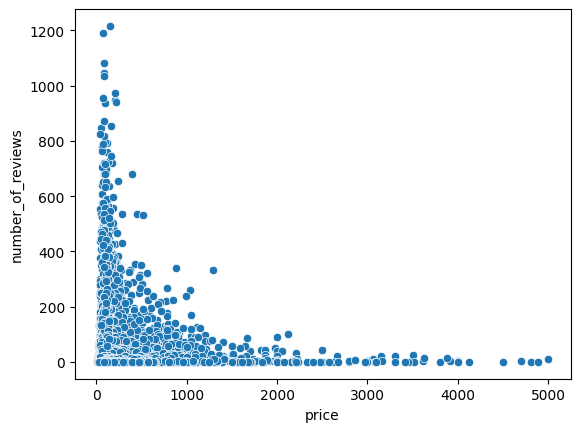

In [27]:
sns.scatterplot(x=filtered_price.loc[:,'price'], y=df_airbnb['number_of_reviews'])

In [28]:
filtered_to_1000 = filtered_price[filtered_price.loc[:,'price']<1000]

In [29]:
filtered_to_1000.loc[:,'price']

0       108.0
1        48.0
2       159.0
3        48.0
4       115.0
        ...  
7491    175.0
7492    195.0
7493    113.0
7494     32.0
7495     87.0
Name: price, Length: 7236, dtype: object

<Axes: xlabel='price', ylabel='number_of_reviews'>

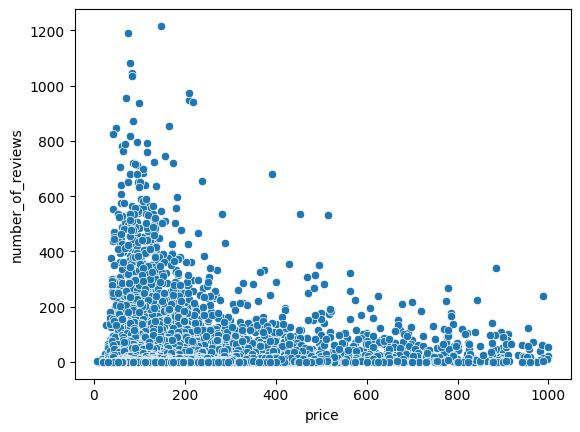

In [30]:
sns.scatterplot(x=filtered_to_1000.loc[:,'price'], y=df_airbnb['number_of_reviews'])

In [31]:
v = df_airbnb.groupby('room_type')['price'].mean()

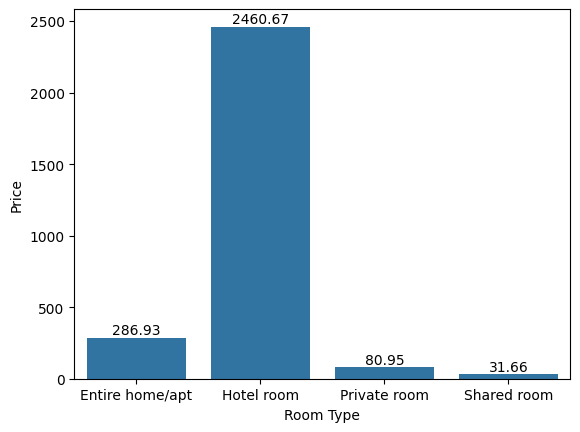

In [32]:
ax = sns.barplot(x = v.index, y = v.values)
plt.xlabel('Room Type')
plt.ylabel('Price')
for i, value in enumerate(v.values):
    ax.text(x = i, y = value +1, s=f'{value:.2f}', ha='center', va='bottom')

In [33]:
df_airbnb.groupby('room_type').size()

room_type
Entire home/apt    6392
Hotel room            3
Private room       1051
Shared room          50
dtype: int64

In [ ]:
#------October 17 EDA------# 

In [65]:
df_airbnb.sample(2)

,prim_id,id,name,neighbour_overview,host_location,host_neighbourhood,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,number_of_reviews,review_scores_rating,ratings_as_percent
6294,6294,1024856229691383829,Gorgeous Lakehouse ~Private Boat Slip~ Lake Au...,Lake Austin is a stunning freshwater lake loca...,"Austin, TX",Midtown,Entire home,Entire home/apt,10,3.0,4.0,7.0,"[""Hot water"", ""Outdoor dining area"", ""Ceiling ...",790.0,23,4.87,97.4
5815,5815,967517942236357064,Amazing 1bd 1ba condo in Downtown Austin.,Downtown Austin. 99 walkable score.<br />Move ...,"Austin, TX",South Lamar,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,"[""Ceiling fan"", ""Building staff"", ""Exercise eq...",90.0,15,4.93,98.6


In [ ]:
# I am planning to run ANOVA test on this dataset.
# To check if room type has anything to do with rating score
# Before that I need to check distribution using boxplots.

In [74]:
df_airbnb.groupby("room_type")['ratings_as_percent'].std()

room_type
Entire home/apt    5.292187
Hotel room         0.000000
Private room       7.007259
Shared room        6.427336
Name: ratings_as_percent, dtype: float64

<Axes: xlabel='room_type', ylabel='ratings_as_percent'>

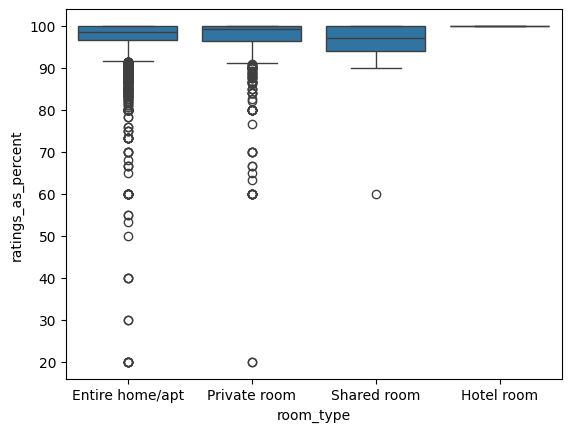

In [62]:
sns.boxplot(x = 'room_type', y= "ratings_as_percent", data = df_airbnb) # not sure yet if ANOVA is apt.

In [ ]:
# Next, let's plot a heatmap to see which attributes are strongly correlated with ratings.

In [69]:
cor_matrix = df_airbnb[['ratings_as_percent','price','accommodates', 'bathrooms','bedrooms', 'beds']].corr()

In [71]:
cor_matrix

,ratings_as_percent,price,accommodates,bathrooms,bedrooms,beds
ratings_as_percent,1.000000,0.065506,0.016047,0.053952,0.041110,0.025854
price,0.065506,1.000000,0.361968,0.462995,0.406721,0.346338
accommodates,0.016047,0.361968,1.000000,0.761112,0.849108,0.736282
bathrooms,0.053952,0.462995,0.761112,1.000000,0.835332,0.650692
bedrooms,0.041110,0.406721,0.849108,0.835332,1.000000,0.747073
beds,0.025854,0.346338,0.736282,0.650692,0.747073,1.000000


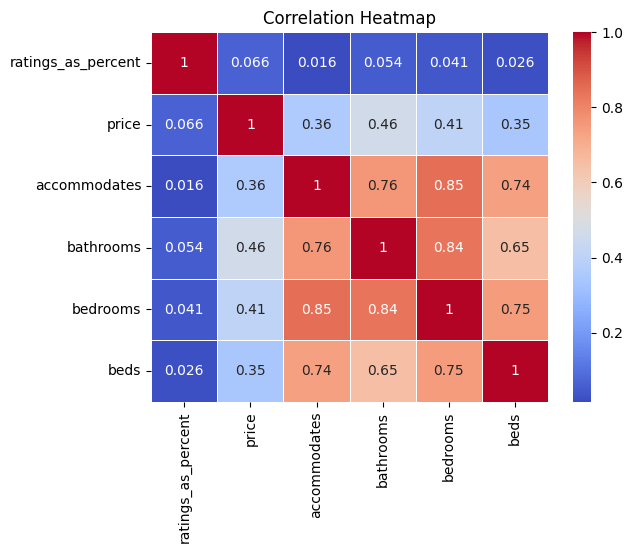

In [72]:
sns.heatmap(cor_matrix, annot = True, cmap = 'coolwarm' , linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.show()